# Spectral Analysis of Deterministic Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Introduction

The analysis of the spectral properties of a signal plays an important role in signal processing. Some application examples are

* [Spectrum analyzer](https://en.wikipedia.org/wiki/Spectrum_analyzer)
* Detection of (harmonic) signals
* [Estimation of fundamental frequency and harmonics](https://en.wikipedia.org/wiki/Modal_analysis)
* Spectral suppression: acoustic echo suppression, noise reduction, ...

Spectral analysis often applies the [discrete Fourier transformation](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) (DFT) onto discrete finite-length signals in order to determine the spectrum and its magnitude.

## The Leakage Effect

[Spectral leakage](https://en.wikipedia.org/wiki/Spectral_leakage) is a fundamental effect of the DFT. It limits the ability to detect harmonic signals in signal mixtures. In order to discuss the properties of the DFT, the transition from the Fourier transform applied to an analytic continuous signal to the DFT applied to a sampled finite-length signal is investigated.

### Continuous Signals and the Fourier Transformation

We first consider the spectrum of one single harmonic signal. For the continuous case this is given by the complex exponential function

$$ x(t) = \mathrm{e}^{\,\mathrm{j}\, \omega_0 \, t}$$

where $\omega_0 = 2 \pi f$ denotes its angular frequency. The Fourier-Transformation of the exponential function is

$$ X(\mathrm{j}\, \omega) = \int\limits_{-\infty}^{\infty} x(t) \,\mathrm{e}^{\,- \mathrm{j}\, \omega \,t} \mathrm{d}t = 2\pi \; \delta(\omega - \omega_0)$$

The spectrum consists of a single Dirac impulse, hence a clearly isolated and distinguishable event.

### Sampled Signals and the Discrete-Time Fourier Transformation

Now lets considers sampled signals. The discrete exponential signal is derived from its continuous counterpart by equidistant sampling $x[k] := x(k T)$ with the sampling interval $T$

$$ x[k] = \mathrm{e}^{\,\mathrm{j}\, \Omega_0 \,k}$$

where $\Omega_0 = \omega_0 T$ denotes the normalized angular frequency. The [discrete-time Fourier transform](https://en.wikipedia.org/wiki/Discrete-time_Fourier_transform) (DTFT) is the Fourier transformation of a sampled signal. For the exponential signal it is given as

$$ X(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \sum_{k = -\infty}^{\infty} x[k]\, \mathrm{e}^{\,-\mathrm{j}\, \Omega \,k} = 2\pi \sum_{n = -\infty}^{\infty} \delta((\Omega-\Omega_0) - 2\,\pi\,n)$$

The spectrum of the DTFT is periodic due to sampling. As a consequence, the transformation of the discrete exponential signal consists of a series Dirac impulses. For the region of interest $-\pi < \Omega \leq \pi$ the spectrum consists of a clearly isolated and distinguishable event, as for the continuous case.

The DTFT cannot be realized in practice, since is requires the knowledge of the signal $x[k]$ for all time instants $k$. The DFT can be derived from the DTFT in two steps

1. truncation (windowing) of the signal
2. sampling of the DTFT spectrum

The consequences of these two steps are investigated in the following two sections.

### Finite-Length  Discrete Signals and the Discrete-Time Fourier Transformation

Truncation of the signal is modeled by multiplying the signal with a window function $w[k]$

$$ x_w[k] = x[k] \cdot w[k]$$

where $x_w[k]$ denotes the windowed signal. Its spectrum $X_w(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ can be derived from the multiplication theorem of the DTFT as

$$ X_w(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \frac{1}{2 \pi} X(\mathrm{e}^{\,\mathrm{j}\, \Omega}) \circledast W(\mathrm{e}^{\,\mathrm{j}\, \Omega})$$

where $\circledast$ denotes the cyclic/[circular convolution](https://en.wikipedia.org/wiki/Circular_convolution). For a hard truncation of the signal to $N$ samples the window function $w[k] = \text{rect}_N[k]$ yields

$$ W(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \mathrm{e}^{\,-\mathrm{j} \, \Omega \,\frac{N-1}{2}} \cdot \frac{\sin(\frac{N \,\Omega}{2})}{\sin(\frac{\Omega}{2})} $$

Introducing the DTFT of the exponential signal into above findings, exploiting the properties of Dirac impulses and the cyclic convolution allows to derive the DTFT of a truncated exponential signal

$$ X_w(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \mathrm{e}^{\,-\mathrm{j}\, (\Omega-\Omega_0) \, \frac{N-1}{2}} \cdot \frac{\sin(\frac{N\, (\Omega-\Omega_0)}{2})}{\sin(\frac{(\Omega-\Omega_0)}{2})} $$

Above equation is evaluated numerically in order to illustrate the properties of $X_w(\mathrm{e}^{\,\mathrm{j}\, \Omega})$

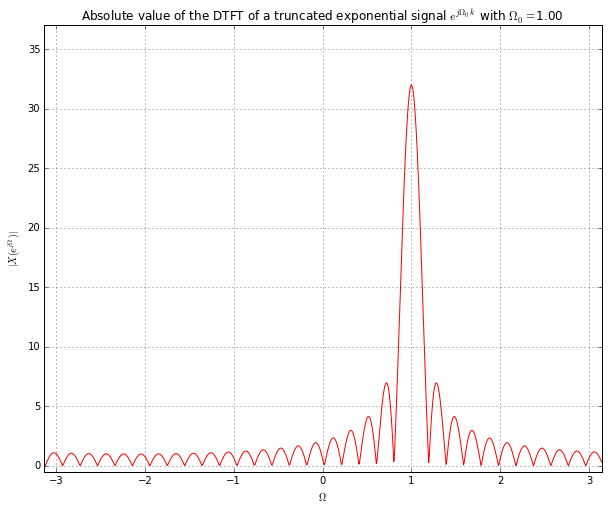

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Om0 = 1  # frequency of exponential signal
N = 32  # length of signal


# DTFT of finite length exponential signal (analytic)
Om = np.linspace(-np.pi, np.pi, num=1024)
Xw = np.exp(-1j*(Om-Om0)*(N-1)/2)*(np.sin(N*(Om-Om0)/2))/(np.sin((Om-Om0)/2))

# plot spectrum
plt.figure(figsize = (10, 8))
plt.plot(Om, abs(Xw), 'r')
plt.title(r'Absolute value of the DTFT of a truncated exponential signal $e^{j \Omega_0 k}$ with $\Omega_0=$%2.2f' %Om0)
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|X(e^{j \Omega})|$')
plt.axis([-np.pi, np.pi, -0.5, N+5])
plt.grid()

**Excercise**

* Change the frequency `Om0` of the signal and rerun the cell. What happens?
* Change the length `N` of the signal and rerun the cell. What happens?

The maximum absolute value of the spectrum is located at the frequency $\Omega_0$. It should become clear that truncation of the exponential signal leads to a broadening of the spectrum. The shorter the signal the wider the mainlobe becomes.

### The Leakage Effect of the Discrete Fourier Transformation

The DFT can be derived from the DTFT $X_w(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ of the truncated signal by sampling the DTFT equiangularly at (angles) $\Omega = \mu \frac{2 \pi}{N}$

$$ X[\mu] = X_w(\mathrm{e}^{\,\mathrm{j}\, \Omega})\big\vert_{\Omega = \mu \frac{2 \pi}{N}} $$

For the DFT of the exponential signal we finally get

$$ X_w[\mu] = \mathrm{e}^{\,\mathrm{j}\, (\Omega_0 - \mu \frac{2 \pi}{N}) \frac{N-1}{2}} \cdot \frac{\sin(\frac{N \,(\Omega_0 - \mu \frac{2 \pi}{N})}{2})}{\sin(\frac{\Omega_0 - \mu \frac{2 \pi}{N}}{2})} $$

The sampling of the DTFT is illustrated in the following example. Note, the normalized angular frequency $\Omega_0$ has been expressed in terms of the periodicity $M$ of the exponential signal $\Omega_0 = M \; \frac{2\pi}{N}$.

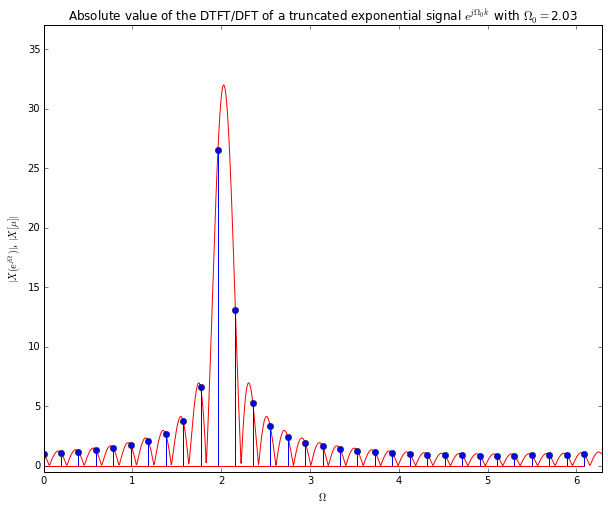

In [2]:
N = 32  # length of the signal
M = 10.33  # periodicity of the exponential signal
Om0 = M*(2*np.pi/N)  # frequency of exponential signal


# DTFT of finite length exponential signal (analytic)
Om = np.linspace(0, 2*np.pi, num=1024)
Xw = np.exp(-1j*(Om-Om0)*(N-1)/2)*(np.sin(N*(Om-Om0)/2))/(np.sin((Om-Om0)/2))

# DFT of the exponential signal by FFT
x = np.exp(1j*Om0*np.arange(N))
X = np.fft.fft(x)
mu = np.arange(N) * 2*np.pi/N

# plot spectra
plt.figure(figsize = (10, 8))
plt.hold(True)

plt.plot(Om, abs(Xw), 'r')
plt.stem(mu, abs(X))
plt.title(r'Absolute value of the DTFT/DFT of a truncated exponential signal $e^{j \Omega_0 k}$ with $\Omega_0=$%2.2f' %Om0)
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|X(e^{j \Omega})|$, $|X[\mu]|$')
plt.axis([0, 2*np.pi, -0.5, N+5]);

plt.show()

**Exercise**

* Change the periodicity `M` of the exponential signal and rerun the cell. What happens if the periodicity is an integer? Why?
* Change the length `N` of the DFT? What happens?
* What conclusions can be drawn for the analysis of exponential signals by the DFT?

You should have noticed that for an exponential signal whose periodicity is an integer $M \in \mathbb{N}$, the DFT consists of a discrete Dirac pulse $X[\mu] = \delta[\mu - M]$. In this case, the sampling points coincide with the maximum of the main lobe or the zeros of the DTFT. For non-integer $M$, hence non-periodic exponential signals with respect to the signal length $N$, the DFT has additional contributions. The shorter the length $N$, the wider these contributions are spread in the spectrum. This smearing effect is known as *leakage effect* of the DFT. This effect limits the achievable frequency resolution of the DFT when analyzing signals mixtures with more than one exponential signal. This is illustrated in the following.

### Analysis of Signal Mixtures by the Discrete Fourier Transformation

In order to discuss the implications of the leakage effect when analyzing signal mixtures, the superposition of two exponential signals with different amplitudes and frequencies is considered. For convenience, a function is defined that calculates and plots the magnitude spectrum

In [3]:
def dft_signal_mixture(N, A1, M1, A2, M2):
    # N: length of signal/DFT
    # A1, M1, A2, M2: amplitude and periodicity of 1st/2nd complex exponential
    
    # generate the signal mixture
    Om0_1 = M1*(2*np.pi/N)  # frequency of 1st exponential signal
    Om0_2 = M2*(2*np.pi/N)  # frequency of 2nd exponential signal
    k = np.arange(N)
    x = A1 * np.exp(1j*Om0_1*k) + A2 * np.exp(1j*Om0_2*k)

    # DFT of the signal mixture
    mu = np.arange(N)
    X = np.fft.fft(x)

    # plot spectrum
    plt.figure(figsize = (10, 8))
    plt.stem(mu, abs(X))
    plt.title(r'Absolute value of the DFT of a signal mixture')
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$|X[\mu]|$')
    plt.axis([0, N, -0.5, N+5]);

Lets first consider the case that the frequencies of the two exponentials are rather apart

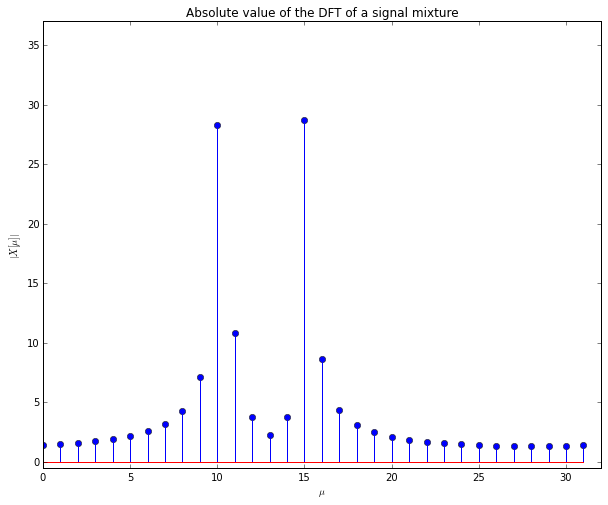

In [4]:
dft_signal_mixture(32, 1, 10.3, 1, 15.2)

Investigating the magnitude spectrum one could conclude that the signal consists of two major contributions at the frequencies $\mu_1 = 10$ and $\mu_2 = 15$. Now lets take a look at a situation when the frequencies are closer together

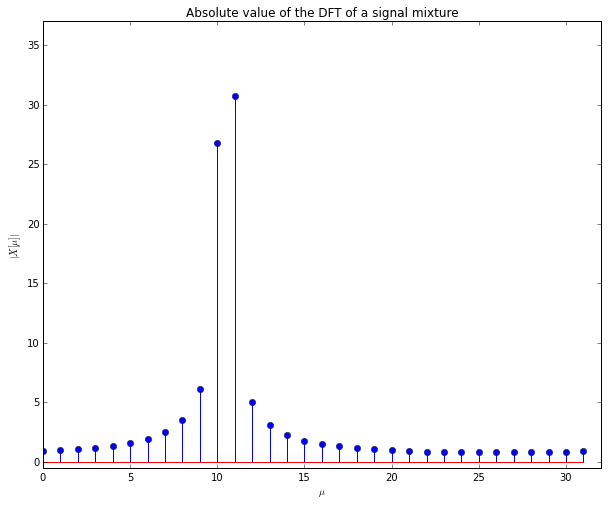

In [5]:
dft_signal_mixture(32, 1, 10.3, 1, 10.9)

From visual inspection of the spectrum it is rather unclear if the mixture consists from one or two exponential signals. So far the levels of both signals where chosen equal. 

Lets consider the case that the second signal has a much lower level that the first one. The frequencies have been chosen equal to the first example

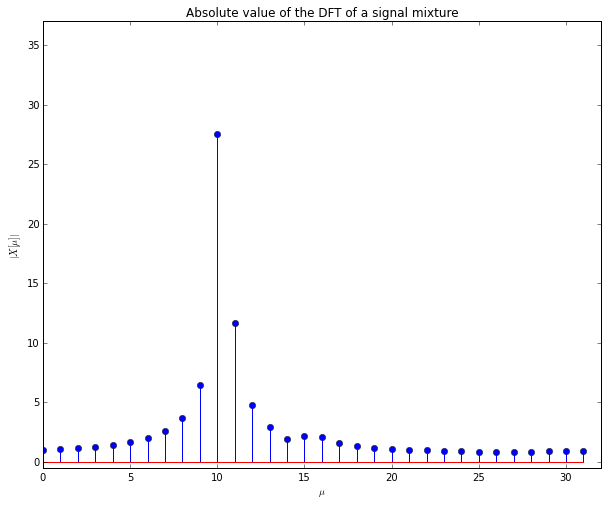

In [6]:
dft_signal_mixture(32, 1, 10.3, 0.1, 15.2)

Now the contribution of the second exponential is hidden in the spread spectrum of the first exponential.

** Copyright **

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>